In [10]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import h5py
import pickle
import logging
from tqdm import tqdm

import numpy as np
from scipy import interpolate
from astropy.io import fits
#import jax.numpy as jnp

sys.path.append(os.environ['DM21CM_DIR'])
import dm21cm.physics as phys
# from dm21cm.data_loader import load_data
# from dm21cm.dm_params import DMParams
# from dm21cm.evolve import get_z_edges

sys.path.append(os.environ['DH_DIR'])
from darkhistory.spec.spectrum import Spectrum
from darkhistory.main import evolve as dh_evolve
from darkhistory.config import load_data as dh_load_data
import darkhistory.physics as dh_phys

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file("../matplotlibrc")

## 1. compare HED

### 1.1 DH on grid

In [67]:
dh_dep_tf = dh_load_data('dep_tf')['highengdep']

In [3]:
dh_xH_arr = dh_dep_tf.x[0][:,0,0]
dh_xHe_arr = dh_dep_tf.x[0][0,:,1]
dh_rs_arr = dh_dep_tf.rs[0]

i_xH = 1
i_xHe = 1
i_rs = 4
i_E = 300

xH = dh_xH_arr[i_xH]
xHe = dh_xHe_arr[i_xHe]
rs = dh_rs_arr[i_rs]

print(xH, xHe, rs)

0.009951801866904308 0.0007856685684398137 6.793051330746054


In [4]:
dh_dep_tf_slice = dh_dep_tf.get_val(xH, xHe, rs)
dh_dep_tf_slice[i_E]

array([ 1.75750284e-14,  1.40953776e-14,  5.67682753e-15, -2.17047803e-17])

In [5]:
hdul = fits.open('ionhist_outputs/tf_z_6.793E+00_x_9.952E-03_nBs_1.000E+00.fits')

In [6]:
hdul[1].data['HED_TF'][0, 300]

IndexError: index 300 is out of bounds for axis 1 with size 2

IDL agrees with DH on grid

### 1.2 DH off grid

In [10]:
i_xH = 1
i_xHe = 1
i_rs = 4
i_E = 300

xH = (dh_xH_arr[i_xH] + dh_xH_arr[i_xH+1]) / 2
xHe = (dh_xHe_arr[i_xHe] + dh_xHe_arr[i_xHe+1]) / 2
rs = np.sqrt(dh_rs_arr[i_rs] * dh_rs_arr[i_rs+1])

print(xH, xHe, rs)

0.1394466116184497 0.011008943022509184 7.257975692943122


In [11]:
dh_dep_tf_slice = dh_dep_tf.get_val(xH, xHe, rs)
dh_dep_tf_slice[i_E]

array([ 1.45276205e-14,  1.17552026e-14,  5.43907351e-14, -2.22061825e-17])

In [14]:
hdul = fits.open('ionhist_outputs/tf_z_7.258E+00_x_1.394E-01_nBs_1.000E+00.fits')

In [15]:
hdul[1].data['HED_TF'][0, 0]

array([ 1.27107982e-14,  1.02835650e-14,  6.39856587e-14, -2.05938945e-17])

can be off by 20 percent!

### 1.3 Off grid

In [28]:
i_xH = 1
i_xHe = 1
i_rs = 4
i_E = 300

x_s = np.linspace(4e-5, 1-4e-5, 100)
rs = dh_rs_arr[i_rs]

print(rs)

6.793051330746054


In [29]:
dh_f_s = np.array([dh_dep_tf.get_val(x, phys.chi*x, rs)[i_E] for x in x_s])

In [51]:
# with h5py.File("../data/tf/230629/phot/phot_dep.h5", 'r') as hf:
#     dm21cm_tfgv = hf['data'][:]
#     dm21cm_axes = hf['axes'][:]
#     dm21cm_abscs = {}
#     for k, item in hf['abscs'].items():
#         dm21cm_abscs[k] = item[:]
# dm21cm_tfinterp = interpolate.RegularGridInterpolator((dm21cm_abscs['rs'], dm21cm_abscs['nBs'], dm21cm_abscs['x']), dm21cm_tfgv[:,300,:,:,:4])
# dt = np.log(1.01) / phys.hubble(rs)
# dm21cm_f_s = np.array([dm21cm_tfinterp((rs, 1.0, x)) / dt for x in x_s])

In [50]:
print('['+'d, '.join([f'{x:.10f}' for x in x_s])+'d]')

[0.0000400000d, 0.0101402020d, 0.0202404040d, 0.0303406061d, 0.0404408081d, 0.0505410101d, 0.0606412121d, 0.0707414141d, 0.0808416162d, 0.0909418182d, 0.1010420202d, 0.1111422222d, 0.1212424242d, 0.1313426263d, 0.1414428283d, 0.1515430303d, 0.1616432323d, 0.1717434343d, 0.1818436364d, 0.1919438384d, 0.2020440404d, 0.2121442424d, 0.2222444444d, 0.2323446465d, 0.2424448485d, 0.2525450505d, 0.2626452525d, 0.2727454545d, 0.2828456566d, 0.2929458586d, 0.3030460606d, 0.3131462626d, 0.3232464646d, 0.3333466667d, 0.3434468687d, 0.3535470707d, 0.3636472727d, 0.3737474747d, 0.3838476768d, 0.3939478788d, 0.4040480808d, 0.4141482828d, 0.4242484848d, 0.4343486869d, 0.4444488889d, 0.4545490909d, 0.4646492929d, 0.4747494949d, 0.4848496970d, 0.4949498990d, 0.5050501010d, 0.5151503030d, 0.5252505051d, 0.5353507071d, 0.5454509091d, 0.5555511111d, 0.5656513131d, 0.5757515152d, 0.5858517172d, 0.5959519192d, 0.6060521212d, 0.6161523232d, 0.6262525253d, 0.6363527273d, 0.6464529293d, 0.6565531313d, 0.6666533

In [31]:
idl_f_s = np.zeros((len(x_s), 4))

for i in range(len(x_s)):
    x = x_s[i]
    with fits.open(f'ionhist_outputs/tf_z_{rs:.3E}_x_{x:.3E}_nBs_1.000E+00.fits') as hdul:
        idl_f_s[i] = hdul[1].data['HED_TF'][0, 0]

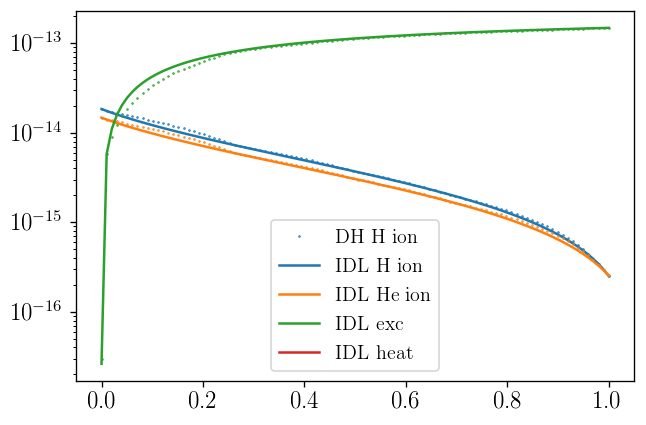

In [71]:
ch_s = ['H ion', 'He ion', 'exc', 'heat']
for i in range(4):
    plt.plot(x_s, dh_f_s[:,i], '.', color=f'C{i}', markersize=1, label=(f'DH {ch_s[i]}' if i == 0 else None))
    plt.plot(x_s, idl_f_s[:,i], color=f'C{i}', ls='-', label=f'IDL {ch_s[i]}')
plt.yscale('log')
plt.legend()